## Time to get you hands dirty!  Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the true position is $\mu = 1$ (in suitable units) and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

--------
## My implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15

### Part 1

In [3]:
# true distribution
mu = 1            
sigma = 0.2       

Generate fake measurements and do the likelihood.

We're in the case where we suppose to know $\sigma$ but we don't know $\mu$. 
So only $\mu$ is a parameter.

(5, 1000)


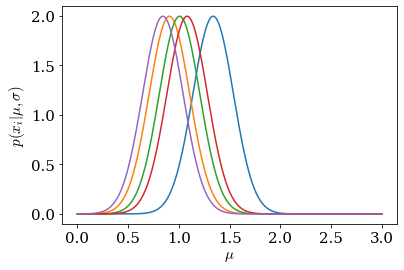

In [4]:
#fake measurements
N = 5    
mugrid = np.linspace(0, 3, 1000)


np.random.seed(7)
xi = scipy.stats.norm(mu, sigma).rvs(N) 
pxi = np.array([scipy.stats.norm(x, sigma).pdf(mugrid) for x in xi])


print(pxi.shape)
for i in range(0, N):
    plt.plot(mugrid, pxi[i])
plt.ylabel('$p(x_{i}|\mu, \sigma)$')
plt.xlabel('$\mu$');

(1000,)


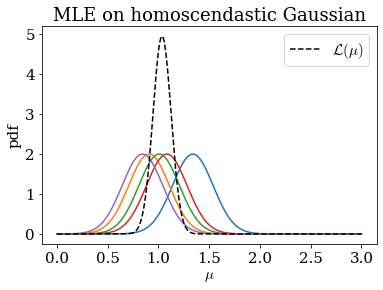

In [5]:
#Likelihood 
L = np.prod(pxi, axis=0)       #ho messo axis=0 se no mi somma tutto. voglio che mi sommi diversi array. se volevo facesse la somma per ogni array, axis=1
print(L.shape)


for i in range(0, N):
    plt.plot(mugrid, pxi[i])
plt.plot(mugrid,L, color='black', linestyle='--', label=r'$\mathcal{L}(\mu)$')    # forse dovrei chiamarlo L({xi})? forse non cambia niente
plt.title('MLE on homoscendastic Gaussian')
plt.xlabel('$\mu$')
plt.ylabel('pdf')
plt.legend();

In [6]:
#maximum likelihood solution and estimator
ML_sol = mugrid[np.argsort(L)[-1]]       
print(r'mu that maximizes the likelihood:', ML_sol) 

ML_est = np.mean(xi)
print('ML estimator (sample mean):', ML_est)

mu that maximizes the likelihood: 1.0360360360360361
ML estimator (sample mean): 1.035040070052355


### Part 2

We now quantify estimate uncertainties.

In [7]:
dmu = mugrid[1]-mugrid[0] # andrebbe bene dottrare qualsiasi elementi adiacenti, tanto il vettore è linspace
Fisher = - np.diff(np.log(L), n=2)/(dmu)**2   
sigma_par = (Fisher[0])**(-0.5)    # voglio prendere solo il primo? se no posso farlo in generale e poi prendere il rpimo solo per paragone
sigma_mean = sigma/N**0.5
print('uncertainty from Fisher matrix:', sigma_par)
print('uncertainty on the mean:', sigma_mean)

uncertainty from Fisher matrix: 0.08944271909990081
uncertainty on the mean: 0.08944271909999159


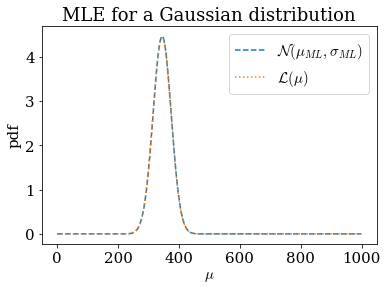

In [8]:
plt.plot(scipy.stats.norm(ML_sol, sigma_par).pdf(mugrid), linestyle='--', label=r'$\mathcal{N}(\mu_{ML}, \sigma_{ML})$')
plt.plot(L*0.9, linestyle=':', label=r'$\mathcal{L}(\mu)$')   #0.9 norm ad occhio
plt.xlabel(r'$\mu$')
plt.ylabel('pdf')
plt.title('MLE for a Gaussian distribution')
plt.legend();

### Part 3

We do part 1 and 2 but with heteroscendastic uncertainties

In [9]:
# generate different uncertainties 
si = scipy.stats.norm(0.2, 0.05).rvs(N)

In [10]:
# generate the measurements with heteroscendastic uncertainties
xi = []
np.random.seed(4)

for s in si:
    xi.append(scipy.stats.norm(mu, s).rvs(1))
xi = np.array(xi)

    
pxi = np.array([scipy.stats.norm(x, s).pdf(mugrid) for x,s  in zip(xi, si)])  
print(pxi.shape)

(5, 1000)


(1000,)


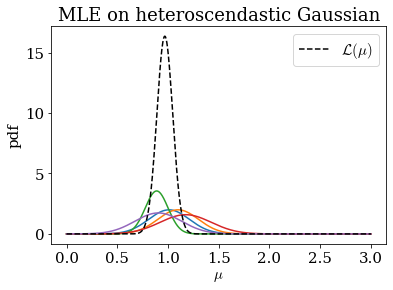

In [11]:
# Likelihood
L = np.prod(pxi, axis=0)       
print(L.shape)

for i in range(0, N):
    plt.plot(mugrid, pxi[i])   
plt.plot(mugrid, L, color='black', linestyle='--', label=r'$\mathcal{L}(\mu)$')
plt.title('MLE on heteroscendastic Gaussian')
plt.xlabel('$\mu$')
plt.ylabel('pdf')
plt.legend();

In [12]:
#maximum likelihood solution and estimator
ML_sol = mugrid[np.argsort(L)[-1]]       
print(r'mu that maximizes the likelihood:', ML_sol)                           


xi = np.reshape(xi, (5,))
ML_est = np.average(xi ,weights = 1/si**2)
print('ML estimator:', ML_est)

mu that maximizes the likelihood: 0.96996996996997
ML estimator: 0.968485807560513


In [13]:
Fisher = - np.diff(np.log(L), n=2)/(dmu)**2   
sigma_par = (Fisher[0])**(-0.5)    # voglio prendere solo il primo? se no posso farlo in generale e poi prendere il rpimo solo per paragone
sigma_mean = np.sum(1/si**2)**-0.5
print('uncertainty from Fisher matrix:', sigma_par)
print('uncertainty on the mean:', sigma_mean)

uncertainty from Fisher matrix: 0.07805889653205128
uncertainty on the mean: 0.07805889653179351


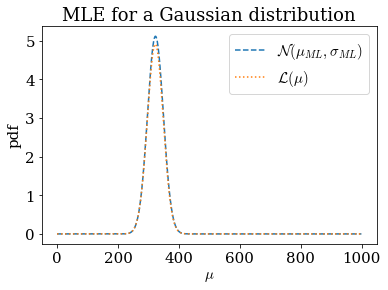

In [14]:
plt.plot(scipy.stats.norm(ML_sol, sigma_par).pdf(mugrid), linestyle='--', label=r'$\mathcal{N}(\mu_{ML}, \sigma_{ML})$')
plt.plot(L*0.3, linestyle=':', label=r'$\mathcal{L}(\mu)$')   #0.9 norm ad occhio
plt.xlabel(r'$\mu$')
plt.ylabel('pdf')
plt.title('MLE for a Gaussian distribution')
plt.legend();